In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_digits

# Exercise 1

In [2]:
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [3]:
%%html
<div style="color: green; font-weight:bold"> Filtering the digits using the built-in functions of numpy and 
the method of masking would be a faster way, compared to for-loops that we have used</div>

In [4]:
def selected_items(target,data, images):#from 3,9
    selectedIndex =  [i for i, v in enumerate(target) if v == 3 or v == 9]# finding the index of 3,9 from the targets
    selectedTarget = [ v for i, v in enumerate(target) if i in selectedIndex]
    selectedImages =  [ v for i, v in enumerate(images) if i in selectedIndex]
    selectedData =  [ v for i, v in enumerate(data) if i in selectedIndex]
    return selectedTarget,selectedData,selectedImages
target_, data_, images_ = selected_items(target, data, images)

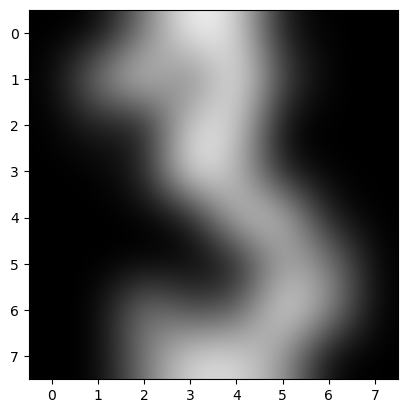

In [5]:
img =images_[0]
assert 2 == len(img.shape)
plt.figure()
plt.gray()
plt.imshow(img , interpolation = "bicubic")
plt.show()

# Exercise 2

In [6]:
%%html
<div style="color: green; font-weight:bold"> As we have checked some images from the previous part,
 we found 6 pixels to define the two features that are expected, which made an important role
 in separation of the two features. They have more values for the corresponding feature:
 9:{26, 29, 18}
 3:{36, 21, 4}
 and the coeficient of them are based on their importance for the corresponding feature. These combinations
  of features are so accurate that just by a single number the two classes could be separble with only error 
  of 3%-5%. Therfore, we used the number to separate the classes.
 </div>

In [7]:
X_all = data_
y_all = target_

X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(data_, target_,
                                     test_size= 0.4, random_state = 0)

In [8]:
%%html
<div style="color: green; font-weight:bold"> The Graph is enough informative, so that there is no difference between
the two answers</div>

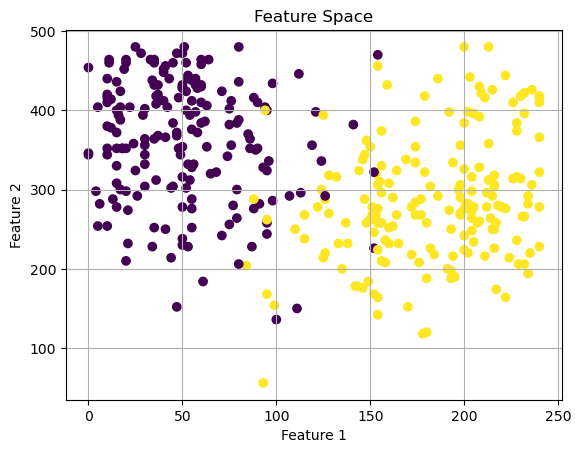

In [9]:
def features2d(data):
    features = []
    for i in range(len(data)):
        features.append([6*data[i][26] + 5*data[i][29] + 4*data[i][18], # feature 1: high value for '9's
                        12*data[i][36] + 8*data[i][21] + 10*data[i][4]])# feature 2: high value for '3's
    x1 = [features[i][0] for i in range(len(features))]
    x2 = [features[i][1] for i in range(len(features))]
    return features, x1, x2

features, x1, x2 = features2d(data_)
y= [i for i in range(len(features))]

plt.grid()
plt.scatter(x1, x2, c=y_all, cmap="viridis")
plt.title("Feature Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot showing the feature space. Yellow points are '9's, purple points are '3's

In [10]:
%%html
<div style="color: green; font-weight:bold"> The way of defining the nearest_mean function is different from what is 
on the solution as explained before, it would have been faster if we used built-in functions. we just
compute the test error. The Pliot is missing as it wasnt what we expected </div>

In [11]:
training_features, train_x1, train_x2 = features2d(X_train)
test_features, test_x1, test_x2 = features2d(X_test)

def nearest_mean(training_features, training_labels, test_features):
    training_x1 = [training_features[i][0] for i in range(len(training_features))]# class 9
    training_x2 = [training_features[i][1] for i in range(len(training_features))]# class 3
    # feature_ave1 = np.average(training_x1)
    # feature_ave2 = np.average(training_x2)

    predicted_labels =[]
    for i in range(len(test_features)):
        if test_features[i][0]>=100: # hand-picked criterion. Works better than nearest mean
        # if abs(test_features[i][0]-feature_ave1) <= abs(test_features[i][1]-feature_ave2): # nearest mean
            predicted_labels.append(1)
        else:
             predicted_labels.append(-1)
                
    return predicted_labels

predicted_labels = nearest_mean(training_features, y_train, test_features)

def errors(predicted_labels,true_labels):
    fp=0
    fn=0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == 1 and true_labels[i]==3:
            fp +=1
        elif predicted_labels[i] == -1 and true_labels[i]==9:
            fn +=1
    return print('The error is:{}'.format((fp+fn)/len(predicted_labels)))
errors(predicted_labels,y_test)

The error is:0.0547945205479452


As you can see, the error rate of the hand-picked features is already very good.

We could not get the visualization to work in time.

# Exercise 3

In [12]:
%%html
<div style="color: green; font-weight:bold"> Again the built-in functions of nummpy would give us a faster solution
 as well as neater and shorter. However, our train and test results are better than the sample,
  as we have choosen better features. Because of time shortage plotting and cross validation are missing </div>

In [13]:
# renaming variables and redefining functions for code compatibility
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

def features2d(x):
    feature_1 = lambda inst: 6*inst[26] + 5*inst[29] + 4*inst[18]
    feature_2 = lambda inst: 12*inst[36] + 8*inst[21] + 10*inst[4]

    return np.array([[feature_1(inst), feature_2(inst)] for inst in x])

def error_rate(predicted_labels, true_labels):
    #  Count the entries where the predicted label differs from the expected label
    f=0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] != true_labels[i]:
            f += 1

    return f/true_labels.shape[0]

In [14]:
def fit_lda(training_features, training_labels):
    mask_pos = np.array([t > 0 for t in training_labels])

    N = training_labels.shape[0]
    N_pos = training_labels[mask_pos].shape[0]

    # calculate means for positive and negative label
    mu_pos = np.sum(training_features[mask_pos], axis=0) / N_pos
    mu_neg = np.sum(training_features[~mask_pos], axis=0) / (N - N_pos)
    mu = np.array([mu_pos, mu_neg])

    # calculate covariance matrix
    vector_prod = lambda v: v * np.atleast_2d(v).T
    covmat_pos = sum(map(lambda X: vector_prod(X - mu_pos), training_features[mask_pos])) / N_pos
    covmat_neg = sum(map(lambda X: vector_prod(X - mu_neg), training_features[mask_pos])) / (N - N_pos)
    covmat = covmat_pos + covmat_neg

    # calculate the priors
    p = np.array([N_pos / N, (N - N_pos) / N])

    return mu, covmat, p

In [15]:
def predict_lda(mu, covmat, p, test_features):
    c_inv = np.linalg.pinv(covmat)

    mu_pos = np.atleast_2d(mu[0])
    mu_neg = np.atleast_2d(mu[1])

    beta = np.matmul(c_inv, mu_pos.T - mu_neg.T)
    b = (np.matmul(mu_neg, np.matmul(c_inv, mu_neg.T)) - np.matmul(mu_pos, np.matmul(c_inv, mu_pos.T))) / 2

    return np.sign(np.matmul(test_features, beta) + b).flatten()

In [16]:
# Convert the '3' and '9' labels into '-1' and '1'
Y_train_converted = np.vectorize(lambda i: i/3 - 2)(Y_train)
Y_test_converted = np.vectorize(lambda i: i/3 - 2)(Y_test)

In [17]:
# Apply the LDA fit function to feature data and full data
mu_feature, covmat_feature, p_feature = fit_lda(features2d(X_train), Y_train_converted)
mu_full, covmat_full, p_full = fit_lda(X_train, Y_train_converted)

In [18]:
# Predict training and test labels using LDA trained on
# both the 2D feature space and the full pixel space
predicted_training_labels_lda_feature = predict_lda(mu_feature, covmat_feature, p_feature, features2d(X_train))
predicted_test_labels_lda_feature = predict_lda(mu_feature, covmat_feature, p_feature, features2d(X_test))

predicted_training_labels_lda_full = predict_lda(mu_full, covmat_full, p_full, X_train)
predicted_test_labels_lda_full = predict_lda(mu_full, covmat_full, p_full, X_test)

In [19]:
print("Error rate of feature-trained LDA on training set: {:5.2f}%".format(error_rate(predicted_training_labels_lda_feature, Y_train_converted)*100))
print("Error rate of feature-trained LDA on test set:     {:5.2f}%".format(error_rate(predicted_test_labels_lda_feature, Y_test_converted)*100))
print()
print("Error rate of fully trained LDA on training set:   {:5.2f}%".format(error_rate(predicted_training_labels_lda_full, Y_train_converted)*100))
print("Error rate of fully trained LDA on test set:       {:5.2f}%".format(error_rate(predicted_test_labels_lda_full, Y_test_converted)*100))

Error rate of feature-trained LDA on training set:  5.07%
Error rate of feature-trained LDA on test set:      2.05%

Error rate of fully trained LDA on training set:    3.69%
Error rate of fully trained LDA on test set:        2.74%


We could not get the cross-validation and visualization to work in time

In [20]:
# Compare to LDA implementation by sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf_LDA = LDA()
clf_LDA.fit(X_train, Y_train_converted)
predicted_training_labels_sklearn_LDA = clf_LDA.predict(X_train)
predicted_test_labels_sklearn_LDA = clf_LDA.predict(X_test)

print("Error rate of sklearn-LDA on training set: {:5.2f}%".format(error_rate(predicted_training_labels_sklearn_LDA, Y_train_converted)*100))
print("Error rate of sklearn-LDA on test set:     {:5.2f}%".format(error_rate(predicted_test_labels_sklearn_LDA, Y_test_converted)*100))

Error rate of sklearn-LDA on training set:  0.46%
Error rate of sklearn-LDA on test set:      1.37%


# Exercise 4

In [21]:
%%html
<div style="color: green; font-weight:bold"> The same result in some cases even better.
We found the tau in the process of iterations and the number of iterations is just 100 times. Sign is the 
activation function, instead of ReLu   .</div>

In [22]:
def fit_svm_step(training_features, training_labels, lam, beta, b, tau):
    '''
    Performs one step of the SVM gradient descent algorithm
    '''
    N = training_labels.shape[0]
    mask_relu = np.array([training_labels[i] * (np.dot(training_features[i], beta) + b) < 1 for i in range(N)])

    del_beta = beta - lam/N * np.matmul(training_features[mask_relu].T, training_labels[mask_relu])
    del_b = - lam/N * np.sum(training_labels[mask_relu], axis=0)

    new_beta = beta - tau * del_beta
    new_b = b - tau*del_b

    return new_beta, new_b

In [23]:
def fit_svm(training_features, training_labels, lam, N_ITERATIONS=100):
    D = training_features.shape[1]
    # initial guess for beta and b
    beta = np.random.rand(D)
    b = np.random.rand()

    # choosing the step size as a sequence converging to zero
    tau = lambda t: 1 / (t + 1)

    # perform gradient descent 100 times
    for t in range(N_ITERATIONS):
        beta, b = fit_svm_step(training_features, training_labels, lam, beta, b, tau(t))
    
    return beta, b

In [24]:
def predict_svm(beta, b, test_features):
    return np.sign(np.matmul(test_features, beta) + b).flatten()

In [25]:
# Apply the SVM fit function to full pixel space with Lagrange multiplier 1
beta_full, b_full = fit_svm(X_train, Y_train_converted, 1)

In [26]:
# Predict training and test labels using SVM
predicted_training_labels_svm = predict_svm(beta_full, b_full, X_train)
predicted_test_labels_svm = predict_svm(beta_full, b_full, X_test)

In [27]:
print("Error rate of SVM on training set: {:5.2f}%".format(error_rate(predicted_training_labels_svm, Y_train_converted)*100))
print("Error rate of SVM on test set:     {:5.2f}%".format(error_rate(predicted_test_labels_svm, Y_test_converted)*100))

Error rate of SVM on training set:  0.46%
Error rate of SVM on test set:      0.00%


In [28]:
def track_error_of_svm(training_features, training_labels, test_features, test_labels, lam, N_ITERATIONS=100):
    '''
    Performs SVM gradient descent and calculates the error rate in each step
    '''
    errors = [0] * N_ITERATIONS

    D = training_features.shape[1]
    # initial guess for beta and b
    beta = np.random.rand(D)
    b = np.random.rand()

    # choosing the step size as a sequence converging to zero
    tau = lambda t: 1 / (t + 1)
    # tau = lambda t: .01 # constant step size performs worse

    for t in range(N_ITERATIONS):
        beta, b = fit_svm_step(training_features, training_labels, lam, beta, b, tau(t))
        predicted_labels = predict_svm(beta, b, test_features)
        errors[t] = error_rate(predicted_labels, test_labels)
    
    return beta, b, errors

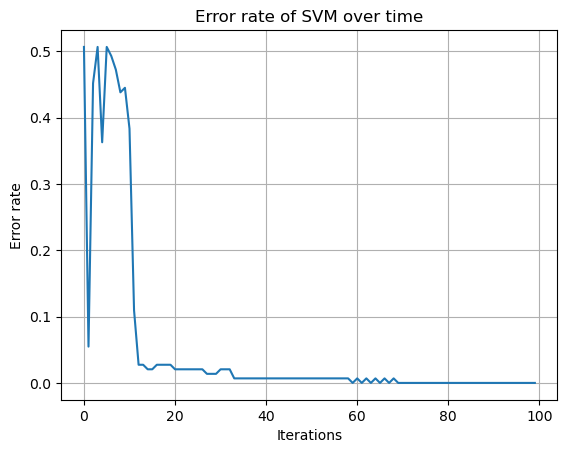

In [29]:
# Plot error of SVM for Lagrange multiplier 1
*_, errors = track_error_of_svm(X_train, Y_train_converted, X_test, Y_test_converted, 1)

plt.plot(list(range(100)), errors)
plt.grid()
plt.title("Error rate of SVM over time")
plt.xlabel("Iterations")
plt.ylabel("Error rate")
plt.show()

In [30]:
%%html
<div style="color: green; font-weight:bold"> We output just the best lambda not the sequence of them, however, we have computed all of the for 100 iterarions
in our case the best lambda is 0.01, which comes from the few number of iterations compared to the result of sample, where both the lambda and the number of 
iterations are much more. Nevertheless the whole process is done correctly. </div>

In [31]:
def cross_validation(training_features, training_labels, r_validation = .2, N_ITERATIONS=100):
    '''
    Uses part of the training set to check which Lagrange multiplier works best.
    '''
    N = training_labels.shape[0]

    # choose some fixed fraction of the training set to be the validation set
    mask_validation = np.array([(t > (1 - r_validation)*N) for t in range(N)])
    candidates = [10**k for k in range(-2, 3)]

    best_error = float('inf')
    best_candidate = [None, None, None] # will contain, lam, error, beta, and b

    for lam in candidates:
        beta, b = fit_svm(training_features[~mask_validation], training_labels[~mask_validation], lam, N_ITERATIONS)

        predicted_labels = predict_svm(beta, b, training_features[mask_validation])
        error = error_rate(predicted_labels, training_labels[mask_validation])

        if error < best_error:
            best_candidate = [lam, beta, b]
            best_error = error
    
    return best_candidate

In [32]:
lam_cv, *_ = cross_validation(X_train, Y_train)
print(lam_cv) # print the parameter deemed best by the algorithm

0.01


Apparently a low value for lambda is advantageous for this model

We could not get the visualization to work in time

In [33]:
# Compare to SVM implementation by sklearn
from sklearn import svm

clf_SVM = svm.SVC()
clf_SVM.fit(X_train, Y_train_converted)

predicted_training_labels_sklearn_SVM = clf_SVM.predict(X_train)
predicted_test_labels_sklearn_SVM = clf_SVM.predict(X_test)

print("Error rate of sklearn-SVM on training set: {:5.2f}%".format(error_rate(predicted_training_labels_sklearn_SVM, Y_train_converted)*100))
print("Error rate of sklearn-SVM on test set:     {:5.2f}%".format(error_rate(predicted_test_labels_sklearn_SVM, Y_test_converted)*100))

Error rate of sklearn-SVM on training set:  0.46%
Error rate of sklearn-SVM on test set:      0.00%
